## Creating CNN using Transfer Learning VGG19

In [1]:
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from glob import glob

In [2]:
# Resize all the images to this
IMAGE_SIZE = [224,224]

train_path = r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Train'
valid_path = r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [4]:
# Don't train the existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# Getting number of outpur classes
folders = glob(r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Train\*')

In [7]:
folders

['C:\\Users\\admin\\Desktop\\Projects\\My Malaria Detection Project\\Dataset\\Train\\Parasite',
 'C:\\Users\\admin\\Desktop\\Projects\\My Malaria Detection Project\\Dataset\\Train\\Uninfected']

In [8]:
# Create Flatten and Dense layers
x = Flatten()(vgg.output)
prediction = Dense(units=len(folders), activation='softmax')(x)

In [9]:
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# View the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Creating own CNN

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image

In [12]:
cnn = Sequential()

In [13]:
cnn.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
cnn.add(Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
cnn.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
cnn.add(Flatten())

In [17]:
cnn.add(Dense(units=500, activation='relu'))
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dense(units=2, activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [19]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Preprocessing the training images
training_datagen = image.ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
training_dataset = training_datagen.flow_from_directory(r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Train',
                                                       target_size=(224,224),
                                                       batch_size=20,
                                                       class_mode='categorical')

Found 416 images belonging to 2 classes.


In [21]:
# Preprocessing the test images
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_dataset = test_datagen.flow_from_directory(r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Test',
                                                target_size=(224,224),
                                                batch_size=20,
                                                class_mode='categorical')

Found 134 images belonging to 2 classes.


In [22]:
# Fit the model

r = cnn.fit_generator(training_dataset, validation_data=test_dataset,
                       epochs=50,
                       steps_per_epoch=len(training_dataset),
                       validation_steps=len(test_dataset))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
21/21 [==============================] - 8s 404ms/step - loss: 1.0033 - accuracy: 0.4928 - val_loss: 0.6918 - val_accuracy: 0.6791
Epoch 2/50
21/21 [==============================] - 8s 390ms/step - loss: 0.6925 - accuracy: 0.5288 - val_loss: 0.6857 - val_accuracy: 0.6791
Epoch 3/50
21/21 [==============================] - 8s 392ms/step - loss: 0.6983 - accuracy: 0.5096 - val_loss: 0.6885 - val_accuracy: 0.6866
Epoch 4/50
21/21 [==============================] - 8s 388ms/step - loss: 0.6891 - accuracy: 0.5481 - val_loss: 0.6727 - val_accuracy: 0.6791
Epoch 5/50
21/21 [==============================] - 8s 391ms/step - loss: 0.6813 - accuracy: 0.5793 - val_loss: 0.6320 - val_accuracy: 0.6791
Epoch 6/50
21/21 [==============================] - 8s 392ms/step - loss: 0.6674 - accuracy: 0.5697 - val_loss: 0.7451 - val_accuracy: 0.4104
Epoch 7/50
21/21 [==============================] - 8s 394ms/step - loss

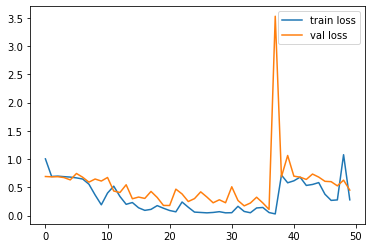

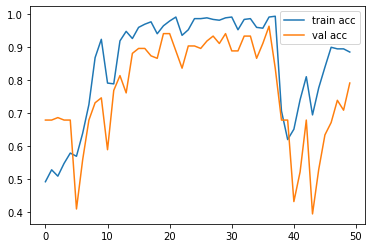

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
y_pred = cnn.predict(test_dataset)

In [25]:
y_pred

array([[1.6662227e-01, 8.3337778e-01],
       [8.0264527e-01, 1.9735472e-01],
       [1.0000000e+00, 1.4688027e-14],
       [1.6662227e-01, 8.3337778e-01],
       [1.0000000e+00, 6.0466003e-14],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6685314e-01, 8.3314693e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.0000000e+00, 1.4836004e-08],
       [1.0000000e+00, 1.5006182e-13],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.6662227e-01, 8.3337778e-01],
       [1.0000000e+00, 1.8560889e-33],
       [9.9291068e-01, 7.0893294e-03],
       [1.6662227e-01, 8.3337778e-01],
       [9.0907210e-01, 9.0927973e-02],
       [9.9999976e-01, 2.

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [27]:
# Save the model
cnn.save('model.h5')

In [28]:
# Load the model and do the prediction for one image
from keras.models import load_model

In [29]:
model = load_model('model.h5')

In [30]:
img = image.load_img(r'C:\Users\admin\Desktop\Projects\My Malaria Detection Project\Dataset\Test\Uninfected\2.png',
                    target_size=(224,224))

In [31]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape

(224, 224, 3)

In [33]:
# Normalization
x = x/225

In [34]:
x = np.expand_dims(x, axis=0)

In [35]:
x.shape

(1, 224, 224, 3)

In [36]:
from keras.applications.resnet50 import preprocess_input

In [37]:
pred_image = preprocess_input(x)

In [38]:
pred_image

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [39]:
a = np.argmax(model.predict(pred_image),axis=1)

In [41]:
if a==1:
    print('Uninfected')
else:
    print('Parasite')

Parasite
